<a href="https://colab.research.google.com/github/afham123/Natural-language-Processing/blob/main/Text_classification_code_along_the_lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving smsspamcollection.tsv to smsspamcollection.tsv


In [3]:
df=pd.read_csv('smsspamcollection.tsv',sep='\t')

In [4]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [ ]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [ ]:
len(df)

5572

In [ ]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [ ]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

Data Vizualization

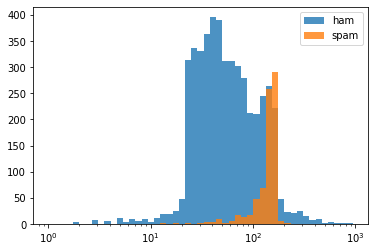

In [ ]:
bins=1.15**np.arange(0,50)
plt.xscale('log')
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

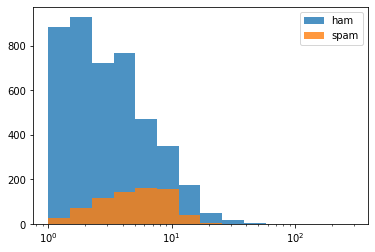

In [ ]:
bins=1.5**np.arange(0,15)
plt.xscale('log')
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [ ]:
df['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [ ]:
df['punct'].describe()

count    5572.000000
mean        4.177495
std         4.623919
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max       133.000000
Name: punct, dtype: float64

Train test split

In [8]:
from sklearn.model_selection import train_test_split

X=df[['length','punct']]
y=df['label']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
X_train.shape

(3900, 2)

In [ ]:
X_test.shape

(1672, 2)

In [ ]:
y_train.shape

(3900,)

Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_model = LogisticRegression(solver='lbfgs')
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
predictions=lr_model.predict(X_test)
predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

    accuracy                           0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [ ]:
print(confusion_matrix(y_test,predictions))

[[1404   44]
 [ 219    5]]


In [ ]:
pd.DataFrame(confusion_matrix(y_test,predictions),index=['ham','spam'],columns=['ham','spam'])

,ham,spam
ham,1404,44
spam,219,5


In [ ]:
accuracy_score(y_test,predictions)

0.8427033492822966

Naive_bayes Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_model=MultinomialNB()

nb_model.fit(X_train,y_train)
predictions=nb_model.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.99      0.92      1448
        spam       0.00      0.00      0.00       224

    accuracy                           0.86      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.75      0.86      0.80      1672



In [ ]:
print(confusion_matrix(y_test,predictions))

[[1438   10]
 [ 224    0]]


In [ ]:
print(accuracy_score(y_test,predictions))

0.8600478468899522


Support Vector Machine Model

In [ ]:
from sklearn.svm import SVC

scv_model=SVC()
scv_model.fit(X_train,y_train)
predictions=scv_model.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.88      0.98      0.93      1448
        spam       0.58      0.17      0.26       224

    accuracy                           0.87      1672
   macro avg       0.73      0.58      0.60      1672
weighted avg       0.84      0.87      0.84      1672



In [ ]:
print(confusion_matrix(y_test,predictions))

[[1420   28]
 [ 186   38]]


In [ ]:
print(accuracy_score(y_test,predictions))

0.8720095693779905


In [9]:
X=df['message']
y=df['label']

In [ ]:
X.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=101)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

count_vector=CountVectorizer()

In [12]:
X_train_counts=count_vector.fit_transform(X_train)
X_train_counts

<3733x7091 sparse matrix of type '<class 'numpy.int64'>'
	with 50565 stored elements in Compressed Sparse Row format>

In [14]:
X_train_counts.shape

(3733, 7091)

In [15]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer()
X_train_tfidf=tfidf_transformer.fit_transform(X_train_counts)

In [17]:
X_train_tfidf.shape

(3733, 7091)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer()
X_train_tfidf=tfidf_vectorizer.fit_transform(X_train)

In [19]:
X_train_tfidf.shape

(3733, 7091)

In [23]:
from sklearn.svm import LinearSVC
svc_model=LinearSVC()
svc_model.fit(X_train_tfidf,y_test)

In [20]:
from sklearn.pipeline import Pipeline

In [24]:
text_clf=Pipeline([('tfid',TfidfVectorizer()),('clf',LinearSVC())])

In [25]:
text_clf.fit(X_train,y_train)
predictions=text_clf.predict(X_test)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [27]:
print(confusion_matrix(y_test,predictions))

[[1618    6]
 [  23  192]]


In [28]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1624
        spam       0.97      0.89      0.93       215

    accuracy                           0.98      1839
   macro avg       0.98      0.94      0.96      1839
weighted avg       0.98      0.98      0.98      1839



In [29]:
print(accuracy_score(y_test,predictions))

0.9842305600870038


In [31]:
text_clf.predict(['Hi! first you saw me in class, what do you think about me?'])

array(['ham'], dtype=object)

In [32]:
text_clf.predict(['Yours mobile is sucessfully recharge with Rs. 500'])

array(['spam'], dtype=object)